In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [3]:
#Here is a case of Binary data
# drop the row with at least one element missing
#row with at least one element missing is for testing
df = pd.read_csv('heart.csv').dropna()
#change the column names to be a bit clearer and be easy to understand
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0     63    1                3                     145          233   
1     37    1                2                     130          250   
2     41    0                1                     130          204   
3     56    1                1                     120          236   
4     57    0                0                     120          354   
5     57    1                0                     140          192   
6     56    0                1                     140          294   
7     44    1                1                     120          263   
8     52    1                2                     172          199   
9     57    1                2                     150          168   
10    54    1                0                     140          239   
11    48    0                2                     130          275   
12    49    1                1                     130          266   
13    64    1                3                     110          211   
14    58    0                3                     150          283   
15    50    0                2                     120          219   
16    58    0                2                     120          340   
17    66    0                3                     150          226   
18    43    1                0                     150          247   
19    69    0                3                     140          239   
20    59    1                0                     135          234   
21    44    1                2                     130          233   
22    42    1                0                     140          226   
23    61    1                2                     150          243   
24    40    1                3                     140          199   
25    71    0                1                     160          302   
26    59    1                2                     150          212   
27    51    1                2                     110          175   
28    65    0                2                     140          417   
29    53    1                2                     130          197   
..   ...  ...              ...                     ...          ...   
273   58    1                0                     100          234   
274   47    1                0                     110          275   
275   52    1                0                     125          212   
276   58    1                0                     146          218   
277   57    1                1                     124          261   
278   58    0                1                     136          319   
279   61    1                0                     138          166   
280   42    1                0                     136          315   
281   52    1                0                     128          204   
282   59    1                2                     126          218   
283   40    1                0                     152          223   
284   61    1                0                     140          207   
285   46    1                0                     140          311   
286   59    1                3                     134          204   
287   57    1                1                     154          232   
288   57    1                0                     110          335   
289   55    0                0                     128          205   
290   61    1                0                     148          203   
291   58    1                0                     114          318   
292   58    0                0                     170          225   
293   67    1                2                     152          212   
294   44    1                0                     120          169   
295   63    1                0                     140          187   
296   63    0                0                     124          197   
297   59    1                

## 1.Select all features, Get accuracy_score

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x = df.iloc[:,0:13]
y = df['target']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 40)
x_train.head()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
151   71    0                0                     112          149   
292   58    0                0                     170          225   
289   55    0                0                     128          205   
0     63    1                3                     145          233   
209   59    1                0                     140          177   

     fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
151                    0         1                      125   
292                    1         0                      146   
289                    0         2                      130   
0                      1         0                      150   
209                    0         1                      162   

     exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
151                        0            1.6         1                  0   
292                        1            2.8         1                  2   
289                        1            2.0         1                  1   
0                          0            2.3         0                  0   
209                        1            0.0         2                  1   

     thalassemia  
151            2  
292            1  
289            3  
0              1  
209            3

In [6]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver = 'lbfgs',max_iter=1000,random_state = 40)
logReg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
y_pred = logReg.predict(x_test)

In [8]:
print(y_pred)

[1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 1 0]


In [9]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9078947368421053


## 2.Calculate accuracy for all features

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
name_list = []
for name in df.columns:
    name_list.append(name)

y = df['target']
for cn in name_list:  
    x = df.iloc[:,name_list.index(cn):name_list.index(cn)+1]   
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=40)    
    logReg = LogisticRegression(solver = 'lbfgs',max_iter=1000,random_state=40)
    logReg.fit(x, y)
    y_pred = logReg.predict(x_test)
    print(cn+"'s accuracy =",accuracy_score(y_test, y_pred))

age's accuracy = 0.618421052631579
sex's accuracy = 0.6447368421052632
chest_pain_type's accuracy = 0.7763157894736842
resting_blood_pressure's accuracy = 0.5263157894736842
cholesterol's accuracy = 0.5657894736842105
fasting_blood_sugar's accuracy = 0.5526315789473685
rest_ecg's accuracy = 0.6052631578947368
max_heart_rate_achieved's accuracy = 0.6842105263157895
exercise_induced_angina's accuracy = 0.7763157894736842
st_depression's accuracy = 0.7368421052631579
st_slope's accuracy = 0.7631578947368421
num_major_vessels's accuracy = 0.75
thalassemia's accuracy = 0.7763157894736842
target's accuracy = 1.0


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x = df.loc[:,['chest_pain_type','exercise_induced_angina','thalassemia','st_depression','st_slope']]
y = df['target']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 40)
x_train.head()

chest_pain_type  exercise_induced_angina  thalassemia  st_depression  \
151                0                        0            2            1.6   
292                0                        1            1            2.8   
289                0                        1            3            2.0   
0                  3                        0            1            2.3   
209                0                        1            3            0.0   

     st_slope  
151         1  
292         1  
289         1  
0           0  
209         2

In [13]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver = 'lbfgs',max_iter=1000,random_state = 40)
logReg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = logReg.predict(x_test)

In [15]:
print(y_pred)

[0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0
 1 1]


In [16]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9078947368421053


## Choose 2 hightest accuracy to get the scatter diagram 

In [17]:
df_zero = df.loc[df['target'] == 0]
df_one = df.loc[df['target'] == 1]
df_zero.head()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
165   67    1                0                     160          286   
166   67    1                0                     120          229   
167   62    0                0                     140          268   
168   63    1                0                     130          254   
169   53    1                0                     140          203   

     fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
165                    0         0                      108   
166                    0         0                      129   
167                    0         0                      160   
168                    0         0                      147   
169                    1         0                      155   

     exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
165                        1            1.5         1                  3   
166                        1            2.6         1                  2   
167                        0            3.6         0                  2   
168                        0            1.4         1                  1   
169                        1            3.1         0                  0   

     thalassemia  target  
165            2       0  
166            3       0  
167            2       0  
168            3       0  
169            3       0

[Text(0, 0.5, 'thalassemia'), Text(0.5, 0, 'st_depression')]

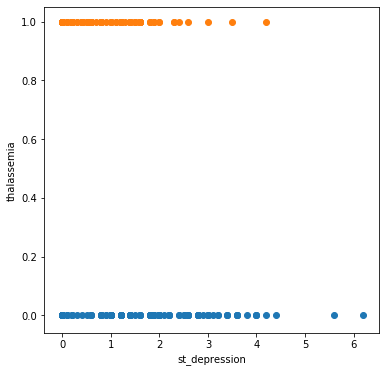

In [18]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df_zero.iloc[:, 9:10], df_zero.iloc[:, 13:14])
ax.scatter(df_one.iloc[:, 9:10], df_one.iloc[:, 13:14])
ax.set(xlabel = 'st_depression', ylabel = 'thalassemia')